In [2]:
%matplotlib inline
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.spines.top"] = False
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
file_path = "C:\\Users\\PV\\Desktop\\student\\student-mat.csv"
df = pd.read_csv(file_path,delimiter=';')

In [4]:
df.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
df.shape

(395, 33)

In [6]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [7]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
df.isnull().sum(axis=0)

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [9]:
s = df['school'].value_counts()

In [10]:
s

GP    349
MS     46
Name: school, dtype: int64

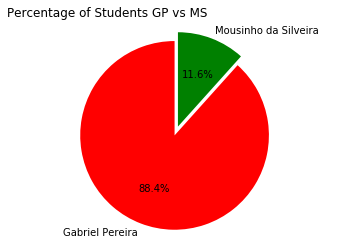

In [11]:
labels = ['Gabriel Pereira','Mousinho da Silveira']
colors = ['red','green']
explode = [0,0.1]
fig1, ax1 = plt.subplots()
ax1.pie(s, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Percentage of Students GP vs MS",loc='left')
plt.show()


In [12]:
df['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [13]:
m_f_ratio = [df[(df['school'] == "GP") & (df['sex'] == "F")]["sex"].count(),
             df[(df['school'] == "GP") & (df['sex'] == "M")]["sex"].count()]

In [14]:
m_f_ratio

[183, 166]

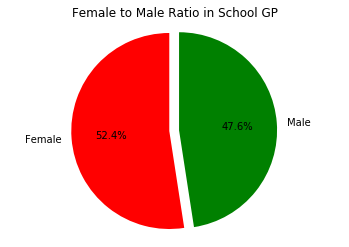

In [15]:
# Pie plot of female to male ratio in school 'GP'
labels = ['Female','Male']
colors = ['red','green']
explode = [0,0.1]
fig2, ax2 = plt.subplots()
ax2.pie(m_f_ratio, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=False, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Female to Male Ratio in School GP")
plt.show()

In [16]:
m_f_ratio1 = [df[(df['school'] == "MS") & (df['sex'] == "F")]["sex"].count(),
             df[(df['school'] == "MS") & (df['sex'] == "M")]["sex"].count()]

In [17]:
m_f_ratio1

[25, 21]

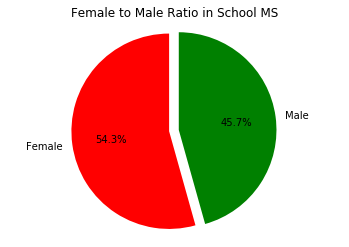

In [18]:
labels = ['Female','Male']
colors = ['red','green']
explode = [0,0.1]
fig3, ax3 = plt.subplots()
ax3.pie(m_f_ratio1, explode=explode, labels=labels,colors=colors,autopct='%1.1f%%',
        shadow=False, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Female to Male Ratio in School MS")
plt.show()

In [19]:
df['age'].value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

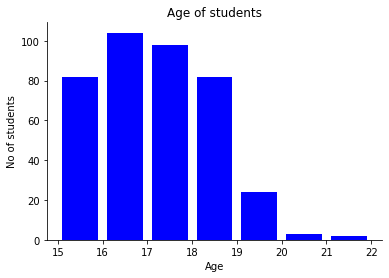

In [20]:
bins = [15,16,17,18,19,20,21,22]
plt.hist(df['age'],bins=bins,histtype='bar',rwidth=0.8,color='blue')
plt.title("Age of students")
plt.xlabel("Age")
plt.ylabel("No of students")
plt.show()

In [21]:
df['address'].value_counts()

U    307
R     88
Name: address, dtype: int64

Text(0.5, 1.0, 'Distibution of Students In Rural and Urban Areas')

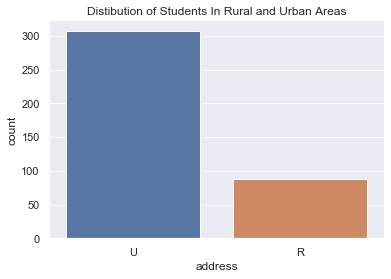

In [22]:
sns.set(style='darkgrid')
ax = sns.countplot(df['address'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_title("Distibution of Students In Rural and Urban Areas")



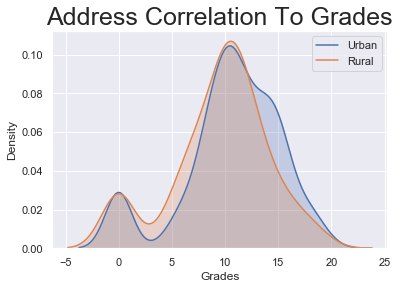

In [23]:
sns.kdeplot(df.loc[df['address']=='U','G3'],label='Urban',shade=True)
sns.kdeplot(df.loc[df['address']=='R','G3'],label='Rural',shade=True)
plt.title("Address Correlation To Grades",fontsize=25)
plt.xlabel("Grades")
plt.ylabel("Density")
plt.show()


### Male to female ratio in different age groups

Text(0, 0.5, 'Number of Students')

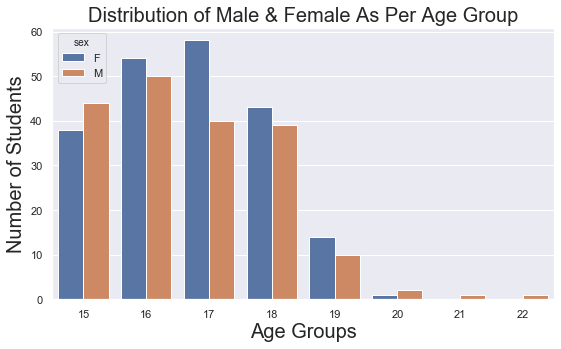

In [24]:
fig3,ax3 = plt.subplots(figsize=(9,5))
ax3 = sns.countplot('age',hue='sex',data=df)
ax3.set_title("Distribution of Male & Female As Per Age Group",fontsize=20)
ax3.set_xlabel("Age Groups",fontsize=20)
ax3.set_ylabel("Number of Students",fontsize=20)



Text(0.5, 1.0, 'Count of Grades')

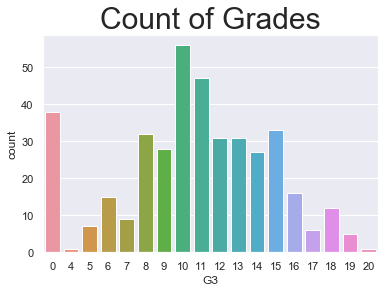

In [25]:
ax = sns.countplot('G3',data=df)
ax.set_title("Count of Grades",fontsize=30)

In [26]:
df['G3'].isnull().sum()

0

## Do students with less failures score higher ?

Text(0, 0.5, 'Grades')

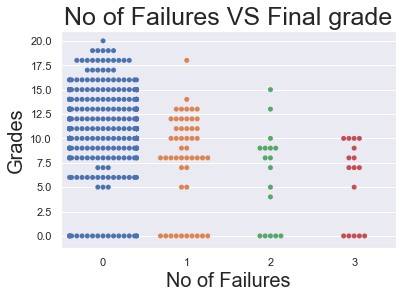

In [27]:
ax = sns.swarmplot(x='failures',y='G3',data=df)
ax.set_title("No of Failures VS Final grade",fontsize=25)
ax.set_xlabel("No of Failures",fontsize=20)
ax.set_ylabel("Grades",fontsize=20)


### Does Education of both parents affect final grades of students 

In [28]:
family_ed = df['Medu']+df['Fedu']


Text(0.5, 0, 'Family Education')

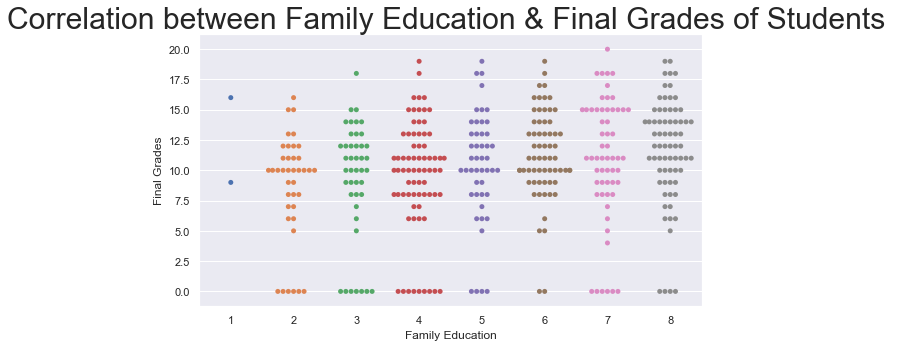

In [29]:
ax = plt.subplots(figsize=(9,5))
ax = sns.swarmplot(x=family_ed,y=df['G3'])
ax.set_title("Correlation between Family Education & Final Grades of Students ",fontsize=30)
ax.set_ylabel("Final Grades")
ax.set_xlabel("Family Education")

### Does internet access affect grades ?

Text(0, 0.5, 'Final Grades')

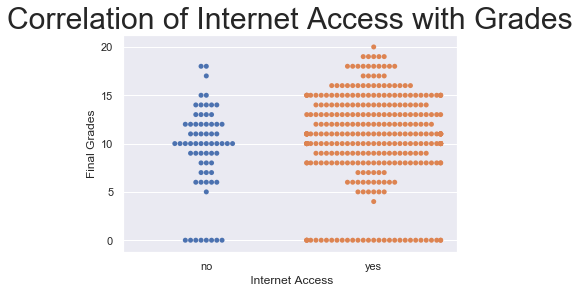

In [30]:
ax=sns.swarmplot(x='internet',y='G3',data=df)
ax.set_title("Correlation of Internet Access with Grades",fontsize=30)
ax.set_xlabel(" Internet Access")
ax.set_ylabel("Final Grades")

### Do students who go out score lesser than their peers ?

Text(0, 0.5, 'Grades')

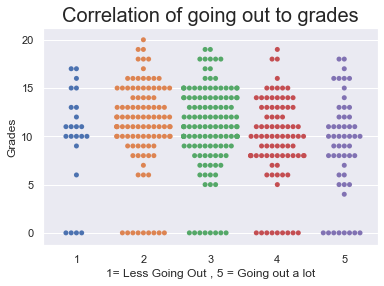

In [31]:
ax = sns.swarmplot(x='goout',y='G3',data=df)
ax.set_title("Correlation of going out to grades",fontsize=20)
ax.set_xlabel("1= Less Going Out , 5 = Going out a lot")
ax.set_ylabel("Grades")


### Does romantic relationship affect grades ?

Text(0.5, 1.0, 'Correlation of Romantic Relationships to Grades')

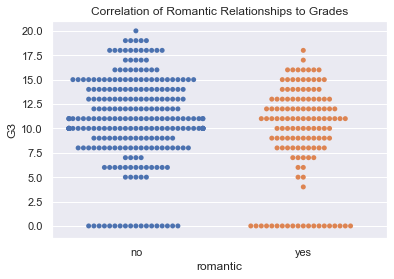

In [32]:
ax=sns.swarmplot(x='romantic',y='G3',data=df)
ax.set_title("Correlation of Romantic Relationships to Grades")
